# EDA 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql

## 1. Cargando el dataset

In [2]:
ruta_archivo = "../data/raw/adidas_us_sales_dataset.xlsx"

df = pd.read_excel(ruta_archivo, index_col=None)

# Eliminar columna de índice anterior si existe
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Guardar en SQLite
conn = sql.connect("../data/raw/adidas_sales.db")
df.to_sql("ventas_adidas", conn, if_exists="replace", index=False)

print("Base de datos creada con éxito")

cursor = conn.cursor()


Base de datos creada con éxito


## 2. Conociendo la estructura del dataset

In [3]:
# Número de filas y columnas:
print(f"Dimensiones del dataset: {df.shape}")

# Información sobre los tipos de datos
print("\nInformación del dataset:")
df.info()

Dimensiones del dataset: (9648, 13)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns

### 🔍 Análisis:

- Tenemos 9648 filas y 13 columnas.
- Hay variables numéricas (float64, int64) y categóricas(object).
- No hay valores nulos en el dataset.

## 3. Revisando los nombres de las columnas

In [4]:
# Nombres de las columnas
print(f"Nombres de las columnas:")
df.columns.tolist()

Nombres de las columnas:


['Retailer',
 'Retailer ID',
 'Invoice Date',
 'Region',
 'State',
 'City',
 'Product',
 'Price per Unit',
 'Units Sold',
 'Total Sales',
 'Operating Profit',
 'Operating Margin',
 'Sales Method']

## 4. Tipos de variables detectadas

In [5]:
print("Tipos de variables en el dataset:")
print(df.dtypes)

Tipos de variables en el dataset:
Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object


### 🔍 Interpretación:

- Numéricas: `Retailer ID`, `Price per Unit`, `Units Sold`, `Total Sales`, `Operating Profit`, `Operating Margin`.
- Categóricas: `Retailer`, `Region`, `State`, `City`, `Product`, `Sales Method`.
- Fechas: `Invoice Date`.

## 5. Análisis de la Distribución de Datos

- Análisis descriptivo rápido para ver la distribución de los valores:

In [6]:
# Para variables numéricas
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [7]:
# Para variables categóricas
df.describe(include=['object', 'category', 'bool'])

,Retailer,Region,State,City,Product,Sales Method
count,9648,9648,9648,9648,9648,9648
unique,6,5,50,52,6,3
top,Foot Locker,West,California,Portland,Men's Street Footwear,Online
freq,2637,2448,432,360,1610,4889


### 🔍 Análisis :

- Para variables numéricas: Nos interesa la media (`mean`), mediana (`50%`), valores extremos (`min` y `max`) para cada variable o columna.

- Para variables categóricas: Vemos cuántas categorías existen (`unique`) y cuál es el más frecuente (`top`).


#### Valores distintos `unique`:

- Retailer: 6 valores (categorías) únicos(as).
- Region: 5 valores (categorías) únicos(as).
- State: 50 valores (categorías) únicos(as).
- City: 52 valores (categorías) únicos(as).
- Product: 6 valores (categorías) únicos(as).
- Sales Method: 3 valores (categorías) únicos(as).

#### Valores más frecuentes (moda de las variables categóricas)

- Retailer: 
    - count: Hay 9648 datos.
    - unique: Hay 6 valores diferentes o únicos.
    - top: El dato más común es `Foot Locker`.
    - freq: El dato más común aparece 2637 veces.

- Region:
    - count: Hay 9648 datos.
    - unique: Hay 5 valores diferentes o únicos.
    - top: El dato más común es `West`.
    - freq: El dato más común aparece 2448 veces.

- State:
    - count: Hay 9648 datos.
    - unique: Hay 50 valores diferentes o únicos.
    - top: El dato más común es `California`.
    - freq: El dato más común aparece 432 veces.

- City:
    - count: Hay 9648 datos.
    - unique: Hay 52 valores diferentes o únicos.
    - top: El dato más común es `Portland`.
    - freq: El dato más común aparece 360 veces.

- Product:
    - count: Hay 9648 datos.
    - unique: Hay 6 valores diferentes o únicos.
    - top: El dato más común es `Men's Street Footwear`.
    - freq: El dato más común aparece 1610 veces.

- Sales Method:
    - count: Hay 9648 datos.
    - unique: Hay 3 valores diferentes o únicos.
    - top: El dato más común es `Online`.
    - freq: El dato más común aparece 4889 veces.

## 6. Exploración de calidad de datos (Detectar Posibles Problemas)

### ✅ Datos Faltantes o Nulos

In [8]:
print("Valores nulos por columna:")
df.isnull().sum()

Valores nulos por columna:


Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [9]:
# Usando SQLite
valores_nulos = """
                SELECT
                    SUM(CASE WHEN Retailer IS NULL THEN 1 ELSE 0 END) AS retailer_nulos,
                    SUM(CASE WHEN `Retailer ID` IS NULL THEN 1 ELSE 0 END) AS retailerid_nulos,
                    SUM(CASE WHEN `Invoice Date` IS NULL THEN 1 ELSE 0 END) AS invoice_date_nulos,
                    SUM(CASE WHEN Region IS NULL THEN 1 ELSE 0 END) AS region_nulos,
                    SUM(CASE WHEN State IS NULL THEN 1 ELSE 0 END) AS state_nulos,
                    SUM(CASE WHEN City IS NULL THEN 1 ELSE 0 END) AS city_nulos,
                    SUM(CASE WHEN Product IS NULL THEN 1 ELSE 0 END) AS products_nulos,
                    SUM(CASE WHEN `Price per Unit` IS NULL THEN 1 ELSE 0 END) AS price_per_unit_nulos,
                    SUM(CASE WHEN `Units Sold` IS NULL THEN 1 ELSE 0 END) AS units_sold_nulos,
                    SUM(CASE WHEN `Total Sales` IS NULL THEN 1 ELSE 0 END) AS total_sales_nulos,
                    SUM(CASE WHEN `Operating Profit` IS NULL THEN 1 ELSE 0 END) AS operating_profit_nulos,
                    SUM(CASE WHEN `Operating Margin` IS NULL THEN 1 ELSE 0 END) AS operating_margin_nulos,
                    SUM(CASE WHEN `Sales Method` IS NULL THEN 1 ELSE 0 END) AS sales_methond_nulos
                FROM ventas_adidas;
                """
valores_nulos = pd.read_sql_query(valores_nulos, conn)
valores_nulos

,retailer_nulos,retailerid_nulos,invoice_date_nulos,region_nulos,state_nulos,city_nulos,products_nulos,price_per_unit_nulos,units_sold_nulos,total_sales_nulos,operating_profit_nulos,operating_margin_nulos,sales_methond_nulos
0,0,0,0,0,0,0,0,0,0,0,0,0,0


### ✅ Datos Duplicados

In [10]:
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


In [11]:
consulta = """
            WITH duplicados AS (
                SELECT *,
                    ROW_NUMBER() OVER (
                        PARTITION BY `Retailer ID`, `Invoice Date`, Product, `Sales Method`, City, State, `Price per Unit`
                        ORDER BY `Units Sold` DESC
                    ) AS num_fila
                FROM ventas_adidas
            )
            SELECT *
            FROM duplicados
            WHERE num_fila = 2;
            """
duplicados = pd.read_sql_query(consulta, conn)
duplicados

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,num_fila
0,West Gear,1185732,1969-12-31 19:00:43.945000,Southeast,Florida,Miami,Men's Athletic Footwear,55.0,775,426250.0,149187.5,0.35,In-store,2
1,West Gear,1185732,1969-12-31 19:00:43.945000,Southeast,Florida,Miami,Men's Athletic Footwear,54.0,194,10476.0,5238.0,0.50,Online,2
2,Foot Locker,1185732,1969-12-31 19:00:44.245000,South,Mississippi,Jackson,Women's Athletic Footwear,25.0,91,2275.0,1137.5,0.50,Online,2
3,Sports Direct,1185732,1969-12-31 19:00:44.263000,Midwest,North Dakota,Fargo,Women's Athletic Footwear,25.0,22,550.0,231.0,0.42,Online,2
4,Amazon,1185732,1969-12-31 19:00:44.264000,Midwest,Ohio,Columbus,Women's Street Footwear,20.0,124,2480.0,1314.4,0.53,Online,2
5,Sports Direct,1185732,1969-12-31 19:00:44.289000,Southeast,North Carolina,Charlotte,Women's Street Footwear,20.0,144,2880.0,1584.0,0.55,Online,2
6,Kohl's,1197831,1969-12-31 19:00:44.241000,Midwest,Kansas,Wichita,Women's Athletic Footwear,20.0,42,840.0,378.0,0.45,Online,2
7,Kohl's,1197831,1969-12-31 19:00:44.267000,Midwest,Kansas,Wichita,Men's Street Footwear,20.0,153,3060.0,1499.4,0.49,Online,2
8,Kohl's,1197831,1969-12-31 19:00:44.267000,Midwest,Kansas,Wichita,Women's Athletic Footwear,20.0,26,520.0,249.6,0.48,Online,2
9,Walmart,1197831,1969-12-31 19:00:44.274000,South,Arkansas,Little Rock,Men's Athletic Footwear,20.0,98,1960.0,882.0,0.45,Online,2


In [12]:
# Query para ver si realmente hay registros duplicados
query = """
WITH duplicados AS (
    SELECT *,
        ROW_NUMBER() OVER (
            PARTITION BY `Retailer ID`, `Invoice Date`, Product, `Sales Method`, City, State, `Price per Unit`
            ORDER BY `Units Sold` DESC
        ) AS num_fila
    FROM ventas_adidas
),
seleccionados AS (
    SELECT *
    FROM duplicados
    WHERE num_fila IN (1, 2)
)
SELECT *
FROM (
    SELECT *
    FROM seleccionados
    WHERE num_fila = 1
    LIMIT 1
)
UNION ALL
SELECT *
FROM (
    SELECT *
    FROM seleccionados
    WHERE num_fila = 2
    LIMIT 1
);

"""
consulta = pd.read_sql_query(query, conn)
consulta


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,num_fila
0,West Gear,1128299,1969-12-31 19:00:43.832000,Northeast,Pennsylvania,Philadelphia,Men's Street Footwear,32.0,122,3904.0,1991.04,0.51,Online,1
1,West Gear,1185732,1969-12-31 19:00:43.945000,Southeast,Florida,Miami,Men's Athletic Footwear,55.0,775,426250.0,149187.50,0.35,In-store,2


### 🔍 Interpretación:

- No hay valores duplicados, aunque la query de sql nos diga que hay 13 filas duplicadas, pero esto se puede ver que es cierto pero viendolo desde un punto de vista diferente

- Al detectar los registros duplicados con Python, vemos que hay 0 duplicados.

### ✅ Errores en Variables Categóricas

En este caso:
- Categóricas: `Retailer`, `Region`, `State`, `City`, `Product`, `Sales Method`.

In [13]:
df['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [14]:
df['Region'].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [15]:
df['State'].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Alaska',
       'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Utah',
       'Oregon', 'Louisiana', 'Idaho', 'Arizona', 'New Mexico', 'Georgia',
       'South Carolina', 'North Carolina', 'Ohio', 'Kentucky',
       'Mississippi', 'Arkansas', 'Oklahoma', 'Kansas', 'South Dakota',
       'North Dakota', 'Iowa', 'Wisconsin', 'Indiana', 'West Virginia',
       'Maryland', 'Delaware', 'New Jersey', 'Connecticut',
       'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire'],
      dtype=object)

In [16]:
df['City'].unique()

array(['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago',
       'Dallas', 'Philadelphia', 'Las Vegas', 'Denver', 'Seattle',
       'Miami', 'Minneapolis', 'Billings', 'Knoxville', 'Omaha',
       'Birmingham', 'Portland', 'Anchorage', 'Honolulu', 'Orlando',
       'Albany', 'Cheyenne', 'Richmond', 'Detroit', 'St. Louis',
       'Salt Lake City', 'New Orleans', 'Boise', 'Phoenix', 'Albuquerque',
       'Atlanta', 'Charleston', 'Charlotte', 'Columbus', 'Louisville',
       'Jackson', 'Little Rock', 'Oklahoma City', 'Wichita',
       'Sioux Falls', 'Fargo', 'Des Moines', 'Milwaukee', 'Indianapolis',
       'Baltimore', 'Wilmington', 'Newark', 'Hartford', 'Providence',
       'Boston', 'Burlington', 'Manchester'], dtype=object)

In [17]:
df['Product'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [18]:
df['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

## 7. Visualización de la Estructura del Dataset

### 🔰 Distribución de Variables Numéricas

- Numéricas: `Retailer ID`, `Price per Unit`, `Units Sold`, `Total Sales`, `Operating Profit`, `Operating Margin`.

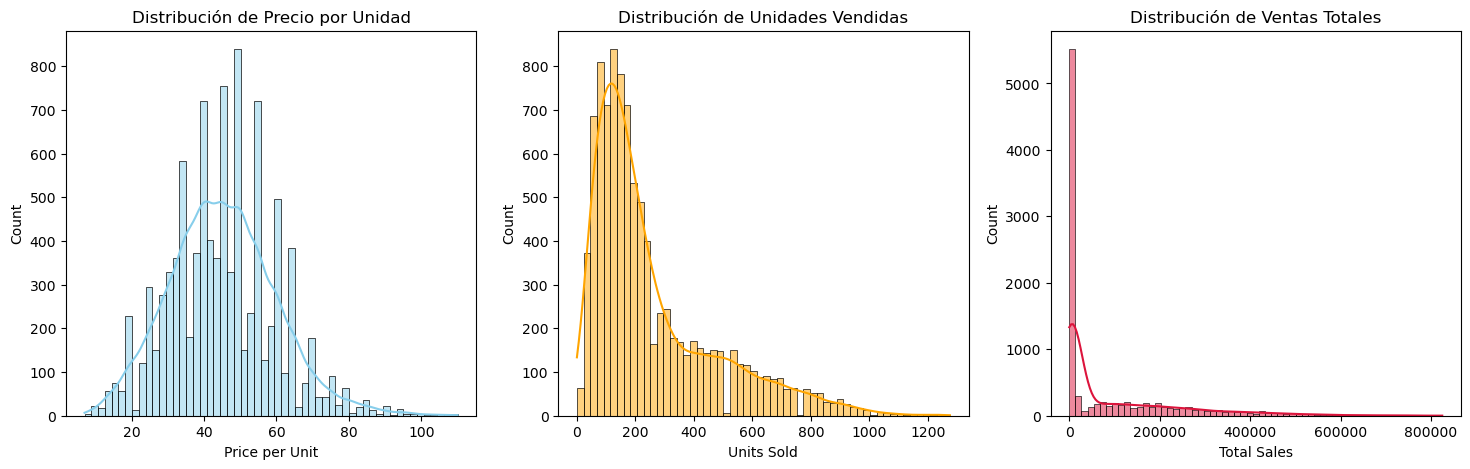

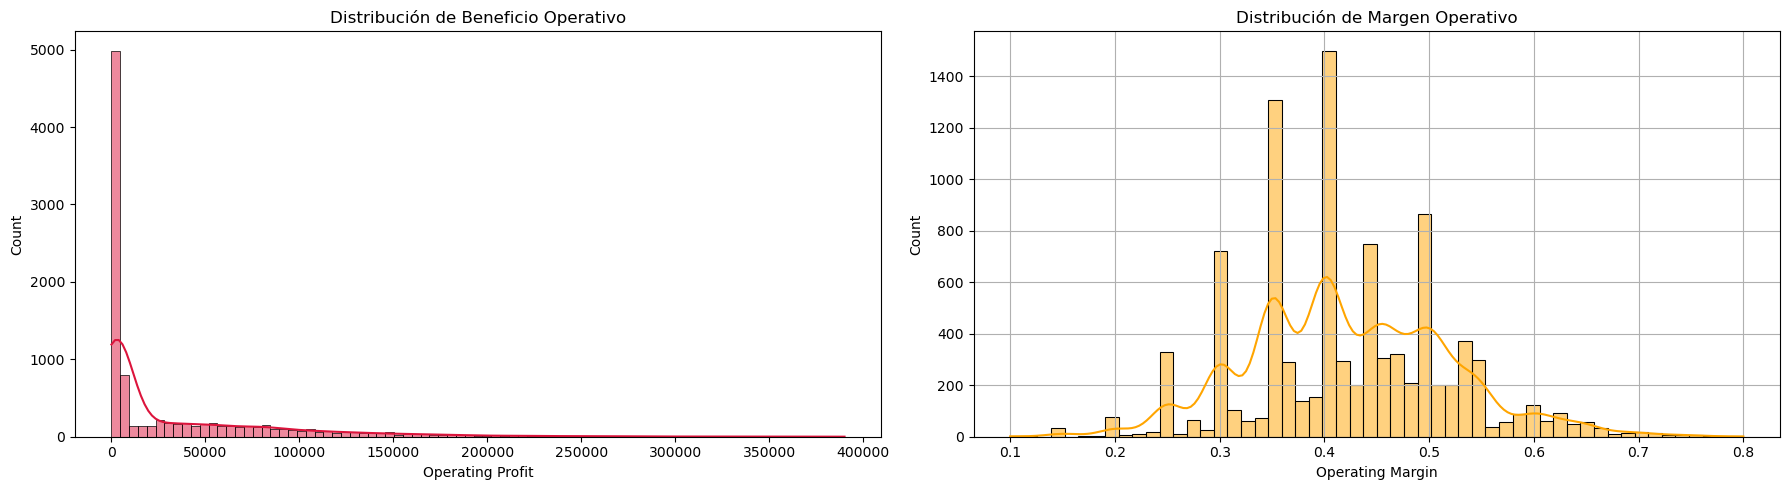

In [43]:
# Datos para histograma de Precio por Unidad
precio_unidad = df['Price per Unit']
# Datos para histograma de Unidades Vendidas
unidades_vendidas = df['Units Sold']
# Datos para histograma de Ventas Totales
ventas_totales = df['Total Sales']

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
# Histograma para precio por unidad
sns.histplot(precio_unidad, kde=True, ax=axs[0], color="skyblue").set(title="Distribución de Precio por Unidad")
# Histograma para unidades vendidas
sns.histplot(unidades_vendidas, kde=True, ax=axs[1], color="orange").set(title="Distribución de Unidades Vendidas")
# Histograma para ventas totales
sns.histplot(ventas_totales, kde=True, ax=axs[2], color="crimson").set(title="Distribución de Ventas Totales")

# Datos de Beneficio Operativo
beneficio_operativo = df['Operating Profit']
# Datos de Margen Operativo
margen_operativo = df['Operating Margin']

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
# Histograma de beneficio operativo
sns.histplot(beneficio_operativo, kde=True, ax=axs[0], color="crimson").set(title="Distribución de Beneficio Operativo")
# Histograma de margen operativo
sns.histplot(margen_operativo, kde=True, ax=axs[1], color="orange").set(title="Distribución de Margen Operativo")



plt.tight_layout()
plt.grid(True)
plt.show()

### 🔍 Interpretación:

#### 1. Histograma de Precio por Unidad:

- Distribución Sesgada hacia la derecha (Sesgo Positivo).

#### 2. Histograma de Unidades Vendidas

- Distribución Sesgada hacia la derecha (Sesgo Positivo).

#### 3. Histograma de Ventas Totales

- Distribución Sesgada hacia la derecha (Sesgo Positivo).

#### 4. Histograma de Beneficio Operativo

- Distribución Sesgada hacia la derecha (Sesgo Positivo).

#### 5. Histograma de Margen Operativo

- Distribución Normal (Simétrica)